# Monte Carlo Path Generator

In [1]:
from pyFTracks.path_generators import MonteCarloPathGenerator
import numpy as np

In [2]:
inversion = MonteCarloPathGenerator((0, 120), (0, 150))

It looks like you have entered temperature in Celsius...Converting temperature to Kelvin


In [3]:
constrain2 = {'time': (60., 150),
              'temperature': (60., 100.)}

constrain3 = {'time': (50., 60.),
              'temperature': (0., 10.)}

constrain4 = {'time': (30., 40.),
              'temperature': (20., 40.)}

constrain5 = {'time': (0., 20.),
              'temperature': (0., 10.)}

In [4]:
constrains = [constrain2, constrain3, constrain4, constrain5]

In [5]:
inversion.add_constraint(constrains)

[{'time': array([0., 0.]), 'temperature': array([273.15, 293.15])},
 {'time': array([ 60., 150.]), 'temperature': array([333.15, 373.15])},
 {'time': array([50., 60.]), 'temperature': array([273.15, 283.15])},
 {'time': array([30., 40.]), 'temperature': array([293.15, 313.15])},
 {'time': array([ 0., 20.]), 'temperature': array([273.15, 283.15])}]

In [6]:
inversion.constraints

[{'time': array([0., 0.]), 'temperature': array([273.15, 293.15])},
 {'time': array([ 60., 150.]), 'temperature': array([333.15, 373.15])},
 {'time': array([50., 60.]), 'temperature': array([273.15, 283.15])},
 {'time': array([30., 40.]), 'temperature': array([293.15, 313.15])},
 {'time': array([ 0., 20.]), 'temperature': array([273.15, 283.15])}]

# Plot Generated Paths

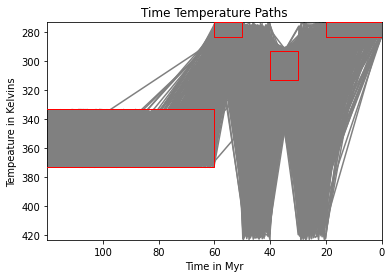

In [7]:
inversion.generate_paths()
ax = inversion.plot_paths()

In [8]:
inversion.constraints

[{'time': array([0., 0.]), 'temperature': array([273.15, 293.15])},
 {'time': array([ 60., 150.]), 'temperature': array([333.15, 373.15])},
 {'time': array([50., 60.]), 'temperature': array([273.15, 283.15])},
 {'time': array([30., 40.]), 'temperature': array([293.15, 313.15])},
 {'time': array([ 0., 20.]), 'temperature': array([273.15, 283.15])}]

# Draw a path

In [9]:
time = np.array([70, 55, 35, 10, 0.])
temperature = np.array([80, 10, 30, 5, 5.])

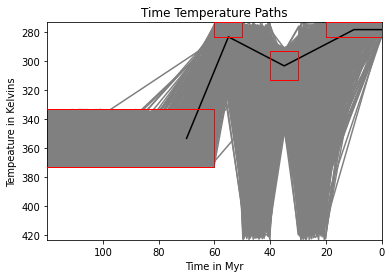

In [10]:
from pyFTracks.thermal_history import ThermalHistory, WOLF1

true_path = ThermalHistory(time, temperature + 273.15)
ax = inversion.plot_paths()
ax.plot(true_path.input_time, true_path.input_temperature, color="k")

## Generate synthetic track lengths

In [11]:
from pyFTracks.annealing import Ketcham1999
from pyFTracks.thermal_history import ThermalHistory

In [12]:
model = Ketcham1999()
model.kinetic_parameter_type = "ETCH_PIT_LENGTH"
model.kinetic_parameter = 1.65
model.history = true_path

In [13]:
model.calculate_age()

(70.0, 70.3774396634549, 1.0081378145290023)

In [14]:
true_age, error_age = model.ft_model_age, model.ft_model_age * 0.10

In [15]:
synthetic_lengths = model.generate_synthetic_lengths(30)

# Inversion

In [16]:
inversion.annealing_model = model

In [17]:
inversion.run(synthetic_lengths, true_age, error_age)

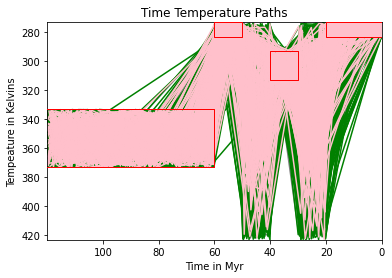

In [18]:
ax = inversion.plot_paths()

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.gcf()

TypeError: cannot unpack non-iterable Figure object

<Figure size 432x288 with 0 Axes>